<a href="https://colab.research.google.com/github/Jac0b03/AMA-3020-Solo-Project/blob/main/Damped_Driven_Oscialltions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

Expresses equation as two first order differential

In [ ]:
  def f(t, x, v, a, b, omega):
      dx_dt = v
      dv_dt = a * np.cos(omega * t) - b * v - np.sin(x)
      return dx_dt, dv_dt

Runge-Kutta Method

In [ ]:
def runge_kutta_step(t, x, v, h, a, b, omega):
    dx_dt, dv_dt = f(t, x, v, a, b, omega)
    k1 = h * dx_dt
    l1 = h * dv_dt

    dx1_dt, dv1_dt = f(t + 0.5 * h, x + 0.5 * k1, v + 0.5 * l1, a, b, omega)
    k2 = h * dx1_dt
    l2 = h * dv1_dt

    dx2_dt, dv2_dt = f(t + 0.5 * h, x + 0.5 * k2, v + 0.5 * l2, a, b, omega)
    k3 = h * dx2_dt
    l3 = h * dv2_dt

    dx3_dt, dv3_dt = f(t + h, x + k3, v + l3, a, b, omega)
    k4 = h * dx3_dt
    l4 = h * dv3_dt

    x_new = x + (k1 + 2 * k2 + 2 * k3 + k4) / 6
    v_new = v + (l1 + 2 * l2 + 2 * l3 + l4) / 6

    return x_new, v_new

def solve_runge_kutta(initial_conditions, a, b, omega, t_end, h):
    t = 0
    x, v = initial_conditions

    results = [(t, x, v)]
    while t < t_end:
        x, v = runge_kutta_step(t, x, v, h, a, b, omega)
        t += h
        results.append((t, x, v))

    return results

Plot-UnderDamped

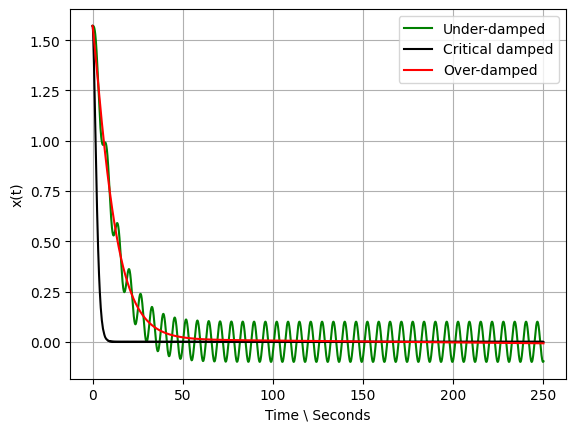

In [ ]:
# Set initial conditions and parameters Under Damped
initial_conditions = [np.pi/2, 0]  # initial values of x and v
a = 1
b = 10
omega = 1
t_end= 250
h = 0.001

# Solve using Runge-Kutta method
solution = solve_runge_kutta(initial_conditions, a, b, omega, t_end, h)

# Extracting time and y1 values from the solution
times = [sol[0] for sol in solution]
x_values = [sol[1] for sol in solution]
v_values = [sol[2] for sol in solution]

# Set initial conditions and parameters Critical Damping
initial_conditions = [np.pi/2, 0]  # initial values of x and v
a2 = 0.1
b2 = 2
omega2 = 10
t_end2= 250
h = 0.001

# Solve using Runge-Kutta method
solution2 = solve_runge_kutta(initial_conditions, a2, b2, omega2, t_end2, h)

# Extracting time and y1 values from the solution
times2 = [sol[0] for sol in solution2]
x_values2 = [sol[1] for sol in solution2]
v_values2 = [sol[2] for sol in solution2]

# Set initial conditions and parameters Over Damped
initial_conditions = [np.pi/2, 0]  # initial values of x and v
a3 = 0.01
b3 = 10
omega3 = 0.01
t_end3= 250
h = 0.001

# Solve using Runge-Kutta method
solution3 = solve_runge_kutta(initial_conditions, a3, b3, omega3, t_end3, h)

# Extracting time and y1 values from the solution
times3 = [sol[0] for sol in solution3]
x_values3 = [sol[1] for sol in solution3]
v_values3 = [sol[2] for sol in solution3]

# Plotting
plt.plot(times, x_values, color='green', label='Under-damped')
plt.plot(times2, x_values2, color='black', label='Critical damped')
plt.plot(times3, x_values3, color='red', label='Over-damped')
plt.xlabel('Time \ Seconds')
plt.ylabel('x(t)')
plt.grid(True)
plt.legend()
plt.savefig('Dampness.pdf')
plt.show()

Chaos correct


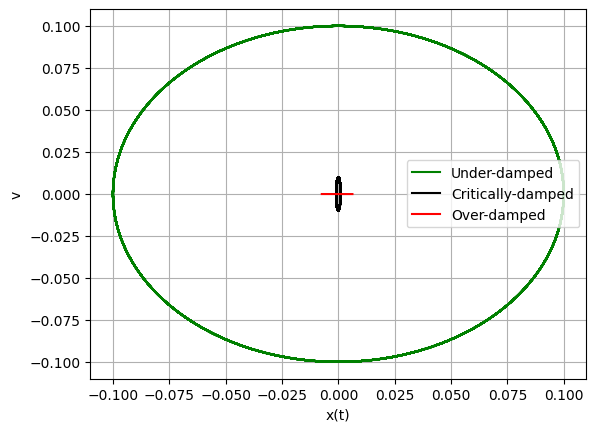

In [ ]:
# Finding the index where time is greater than or equal to 100
index = next(i for i, t in enumerate(times) if t >= 100)
index2 = next(i for i, t in enumerate(times2) if t >= 100)
index3 = next(i for i, t in enumerate(times3) if t >= 100)

#Plot
plt.plot(x_values[index:], v_values[index:], color='green', label='Under-damped')
plt.plot(x_values2[index2:], v_values2[index2:], color='black', label='Critically-damped')
plt.plot(x_values3[index3:], v_values3[index3:], color='red', label='Over-damped')
plt.xlabel('x(t)')
plt.ylabel('v')
plt.grid(True)
plt.legend()
plt.savefig('Chaos.pdf')
plt.show()

Chaos

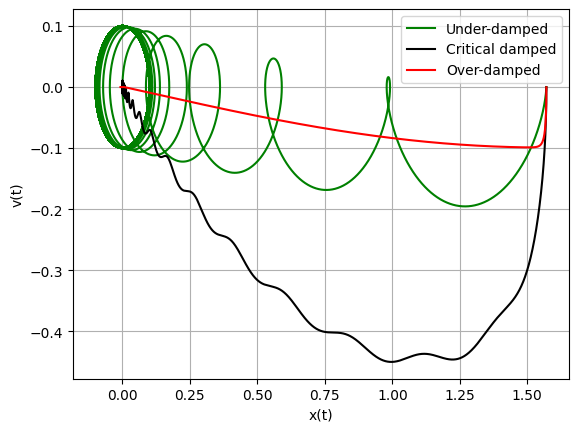

In [ ]:
#Plot
plt.plot(x_values, v_values, color='green', label='Under-damped')
plt.plot(x_values2, v_values2, color='black', label='Critical damped')
plt.plot(x_values3, v_values3, color='red', label='Over-damped')
plt.xlabel('x(t)')
plt.ylabel('v(t)')
plt.grid(True)
plt.legend()
plt.savefig('Phase Space.pdf')
plt.show()

True-Chaos

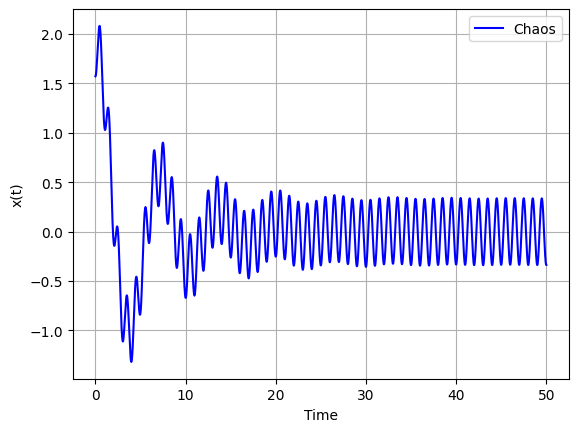

In [ ]:
# Set initial conditions and parameters Over Damped
initial_conditions = [np.pi/2, 0]  # initial values of x and v
ac = 13
bc = 0.3
omegac = 2*np.pi
t_endc= 50
h = 0.001

# Solve using Runge-Kutta method
solutionc = solve_runge_kutta(initial_conditions, ac, bc, omegac, t_endc, h)

# Extracting time and y1 values from the solution
timesc = [sol[0] for sol in solutionc]
x_valuesc = [sol[1] for sol in solutionc]

# Plotting
plt.plot(timesc, x_valuesc, color='blue', label='Chaos')
plt.xlabel('Time')
plt.ylabel('x(t)')
plt.grid(True)
plt.legend()
plt.savefig('Dampness')

Kinetic Energy

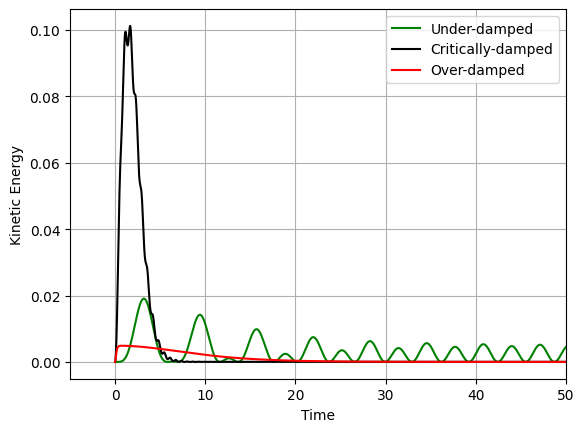

In [ ]:
#Calculate Velocity
v_values = np.gradient(x_values, times)
v_values2 = np.gradient(x_values2, times2)
v_values3 = np.gradient(x_values3, times3)


# Calculate kinetic energy
kinetic_energy_values = 0.5 * v_values**2
kinetic_energy_values2 = 0.5 * v_values2**2
kinetic_energy_values3 = 0.5 * v_values3**2

# Plotting Kinetic Energy
plt.plot(times, kinetic_energy_values, color='green', label='Under-damped')
plt.plot(times, kinetic_energy_values2, color='black', label='Critically-damped')
plt.plot(times, kinetic_energy_values3, color='red', label='Over-damped')
plt.xlabel('Time')
plt.ylabel('Kinetic Energy')
plt.xlim(-5,50)
plt.grid(True)
plt.legend()
plt.show()

Potential Energy

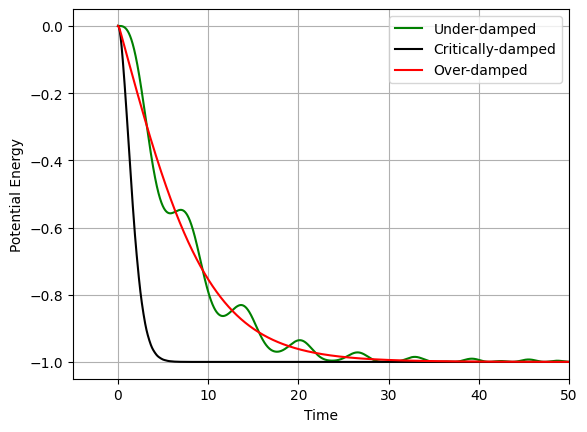

In [ ]:
# Convert x_values and times to NumPy arrays
x_values_np = np.array(x_values)
x_values_np2 = np.array(x_values2)
x_values_np3 = np.array(x_values3)
times_np = np.array(times)
times_np2 = np.array(times2)
times_np3 = np.array(times3)

# Calculate potential energy
potential_energy_values = -np.cos(x_values_np)
potential_energy_values2 = -np.cos(x_values_np2)
potential_energy_values3 = -np.cos(x_values_np3)

# Plotting Potential Energy
plt.plot(times_np, potential_energy_values, color='green', label='Under-damped')
plt.plot(times_np2, potential_energy_values2, color='black', label='Critically-damped')
plt.plot(times_np3, potential_energy_values3, color='red', label='Over-damped')
plt.xlabel('Time')
plt.ylabel('Potential Energy')
plt.xlim(-5,50)
plt.grid(True)
plt.legend()
plt.show()

Power

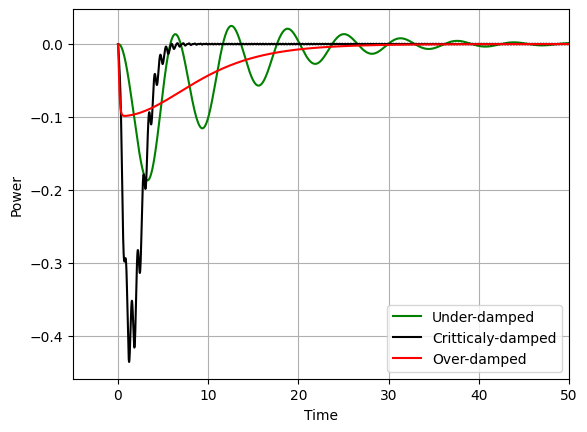

In [ ]:
# Calculate the power
power_values = np.gradient(kinetic_energy_values, times) + np.gradient(potential_energy_values, times)
power_values2 = np.gradient(kinetic_energy_values2, times2) + np.gradient(potential_energy_values2, times2)
power_values3 = np.gradient(kinetic_energy_values3, times3) + np.gradient(potential_energy_values3, times3)

# Plotting Power for the under-damped case
plt.plot(times, power_values, color='green', label='Under-damped')
plt.plot(times2, power_values2, color='black', label='Critticaly-damped')
plt.plot(times3, power_values3, color='red', label='Over-damped')

# Add labels, legend, grid, and save the plot
plt.xlabel('Time')
plt.xlim(-5,50)
plt.ylabel('Power')
plt.grid(True)
plt.legend()
plt.savefig('Power_plot')

plt.show()


Plot - Over damped
